In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

la=10.2

In [ ]:
# Parámetros de servicio
def indicadores(n_agentes,servidos_dia_por_agente,saldo_inicial=60):
    
    target_saldo_final=round(6*la,0)
    mu=float(n_agentes*servidos_dia_por_agente)
    saldo_final=[]
    
     #Se considera un mes simulado de 21 días hábiles
    #10000 simulaciones de un mes tipo

    simulaMes=pd.DataFrame(columns=['dia','ingresados','servidos_teor','servidos_real','saldo'],
                           index=range(21))
    
    
    for j in range(5000):
        simulaMes.dia[0]=1
        simulaMes.ingresados[0]=np.random.poisson(la)
        simulaMes.servidos_teor[0]=np.random.poisson(mu)
        simulaMes.servidos_real[0]=min(simulaMes.servidos_teor[0],saldo_inicial+simulaMes.ingresados[0])
        simulaMes.saldo[0]=saldo_inicial+simulaMes.ingresados[0]-simulaMes.servidos_real[0]

        for i in range(1,21):
            simulaMes.dia[i]=i+1
            simulaMes.ingresados[i]=np.random.poisson(la)
            simulaMes.servidos_teor[i]=np.random.poisson(mu)
            simulaMes.servidos_real[i]=min(simulaMes.servidos_teor[i],simulaMes.ingresados[i]+simulaMes.saldo[i-1])
            simulaMes.saldo[i]=simulaMes.saldo[i-1]+simulaMes.ingresados[i]-simulaMes.servidos_real[i]

        saldo_final.append(simulaMes.saldo[20])
        
    p=float(np.sum([s<target_saldo_final for s in saldo_final]))/len(saldo_final)
    c=np.percentile(saldo_final,0.5)
    
    
    return {'Probabilidad':round(p,3),'Largo':round(c,0),'saldo':len(saldo_final)}

In [ ]:
x=[2,3,4]
y=[4,4.5,5]

simuls=pd.DataFrame(columns=['Agentes','ReqsPorAgente',
                                   'SaldoRiesgo','Probabilidad'],index=range(int(len(x)*len(y))))

In [ ]:
i=0
for elemX in x:
    for elemY in y:
        simuls.Agentes[i]=elemX
        simuls.ReqsPorAgente[i]=elemY
        simuls.SaldoRiesgo[i]=round(float(indicadores(elemX,elemY)['Largo']/6),0)
        simuls.Probabilidad[i]=indicadores(elemX,elemY)['Probabilidad']
        i=i+1

In [ ]:
indicadores(2,4)

In [ ]:
simuls

In [3]:
x=list(np.random.poisson(10.2,1000))
y=list(np.random.poisson(12.5,1000))

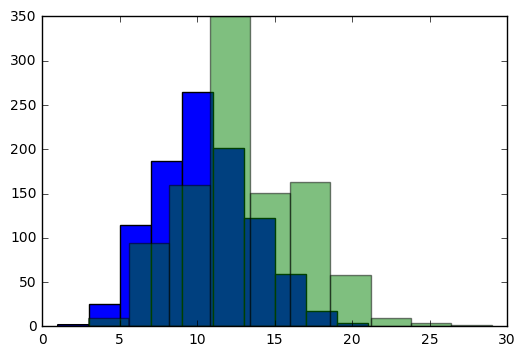

In [4]:
plt.hist(x,bins=10)
plt.hist(y,bins=10,alpha=0.5)
plt.show()